In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from decision_tree_class import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "type"]
dataset = pd.read_csv("../iris.csv", skiprows=1, names=col_names, header=None)
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [4]:
##Giving numbers to different types
types = dataset['type']

label_encoder = LabelEncoder()
# Fit and transform the 'type' column
encoded_types = label_encoder.fit_transform(types)

# Replace the original 'type' column with the encoded values
dataset['type'] = encoded_types

print(dataset['type'].unique())

[0 1 2]


In [11]:
X =dataset.iloc[:,: -1]
y = dataset.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43)

In [12]:
#my classifier
decisionTree = DecisionTreeClassifier(minimum_samples_split=3,max_depth=3)
train_data =pd.concat((X_train,y_train),axis=1)
decisionTree.fit(train_data)
decisionTree.print_tree()


X_2 <= 1.9 ? 0.32716836734693866
 left:0
 right:X_2 <= 4.8 ? 0.37944250871080143
  left:X_0 <= 4.9 ? 0.05551020408163265
    left:2
    right:1
  right:X_3 <= 1.7 ? 0.09246196991586637
    left:X_2 <= 4.9 ? 0.14693877551020418
        left:1
        right:2
    right:2


0.9210526315789473
0.9210526315789473


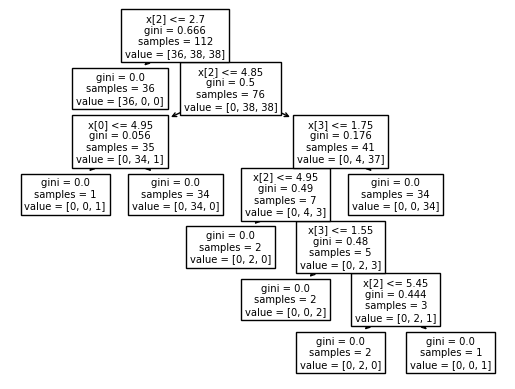

In [13]:
y_pred = decisionTree.predict(X_test)

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y2_pred = dt.predict(X_test)

tree.plot_tree(dt)

decisionTree.accuracy_score(y_pred,y_test.values)
decisionTree.accuracy_score(y2_pred,y_test.values)